In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
# from etl import df5,rd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# from mlxtend.plotting import plot_linear_regression
from sklearn.model_selection import train_test_split
style.use('ggplot')
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

In [2]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 9), dpi=80, facecolor='w', edgecolor='k')

<Figure size 800x720 with 0 Axes>

<Figure size 800x720 with 0 Axes>

In [3]:
df = pd.read_csv('NPD.csv', sep = ',', engine='python')




rd = pd.DataFrame(df, columns =['Date','Outlet', 'Brand','SKU','Size (group)', 'UHD Segment','Sub Res', 'Year', 'Week', 'Units', 'Dollars', 'Stores','Price', 'Productivity'])

rd['Units'] = rd['Units'].astype(int)
rd['Dollars'] = rd['Dollars'].astype(int)
rd['Date'] = pd.to_datetime(rd['Date'])
rd['PriceChange'] = rd['Price']-rd['Price'].shift(1)

def Flag(x):
    if x < 0:
        return 1
    return 0



rd['PriceDownFlag'] = rd['PriceChange'].map(lambda x: Flag(x))

rd = rd[(rd['Units'] > 0) & (rd['Stores'] > 0)]


rd.head()
md = rd

md['Date'] = pd.to_datetime(md['Date'])
md = md.groupby('Date')['Units', 'Dollars'].sum()
md = md.reset_index('Date')
md = md.set_index(['Date'])
md = md.resample('M').sum()

md2 = md.reset_index('Date')
datekeys = md2['Date'].get_values()
firstdate = datekeys[0]
lastdate = datekeys[-1]
md2 = md2[(md2['Date'] != firstdate) & (md2['Date'] != lastdate)]
md = md2.set_index(['Date'])





C:\Users\tytea\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


In [6]:
print(md.head())
print(md.tail())

                Units       Dollars
Date                               
2017-01-31  2385598.0  1.071955e+09
2017-02-28  2319230.0  9.076327e+08
2017-03-31  1925501.0  7.990042e+08
2017-04-30  1574787.0  6.692934e+08
2017-05-31  2052791.0  8.791749e+08
                Units       Dollars
Date                               
2019-05-31  2124421.0  7.846637e+08
2019-06-30  1849250.0  6.963630e+08
2019-07-31  2808867.0  1.038847e+09
2019-08-31  2190018.0  8.083615e+08
2019-09-30  2661238.0  1.020252e+09


In [29]:
# md.resample?

# rd.replace?

In [17]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(md.Units); axes[0, 0].set_title('Original Series')
plot_acf(md.Units, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(md.Units.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(md.Units.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(md.Units.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(md.Units.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

ValueError: view limit minimum -36868.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [27]:
rd = rd[(rd['Date'] != '2018-11-19') & (rd['Date'] != '2018-11-12') & (rd['Date'] != '2018-11-26')]
df = rd


In [16]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(md['Units']); axes[0, 0].set_title('Original Series')
plot_acf(md['Units'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(md['Units'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(md['Units'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(md['Units'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(md['Units'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

C:\Users\tytea\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


ValueError: view limit minimum -36868.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [62]:
from pmdarima.arima.utils import ndiffs

y = md['Units']


## Adf Test
print(ndiffs(y, test='adf'))  # 2

# KPSS test
print(ndiffs(y, test='kpss'))  # 0

# PP test:
print(ndiffs(y, test='pp'))  # 2

0
0
0


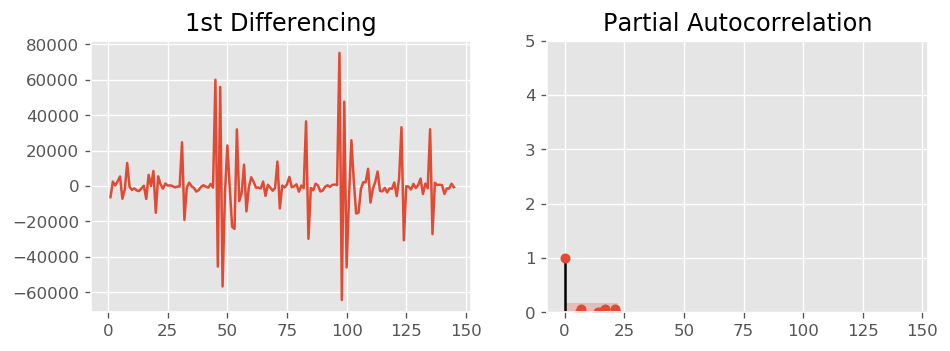

In [63]:
#PACF - PACF sort of conveys the pure correlation between a lag and the series
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(y.diff().dropna(), ax=axes[1])

plt.show()

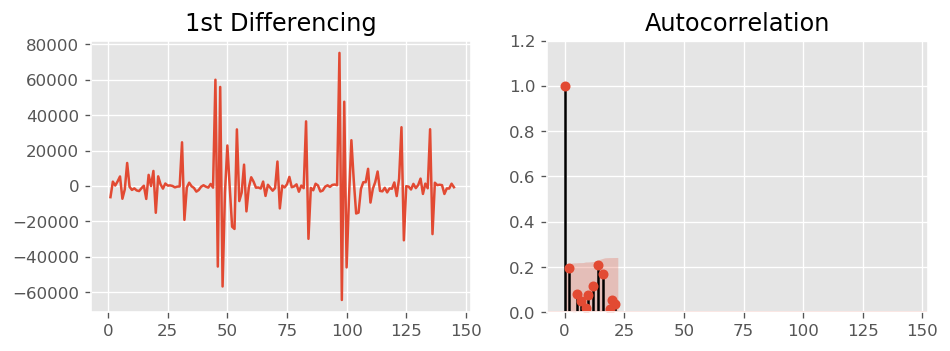

In [64]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(y.diff().dropna(), ax=axes[1])

plt.show()

In [66]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(md, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\tytea\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\tytea\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

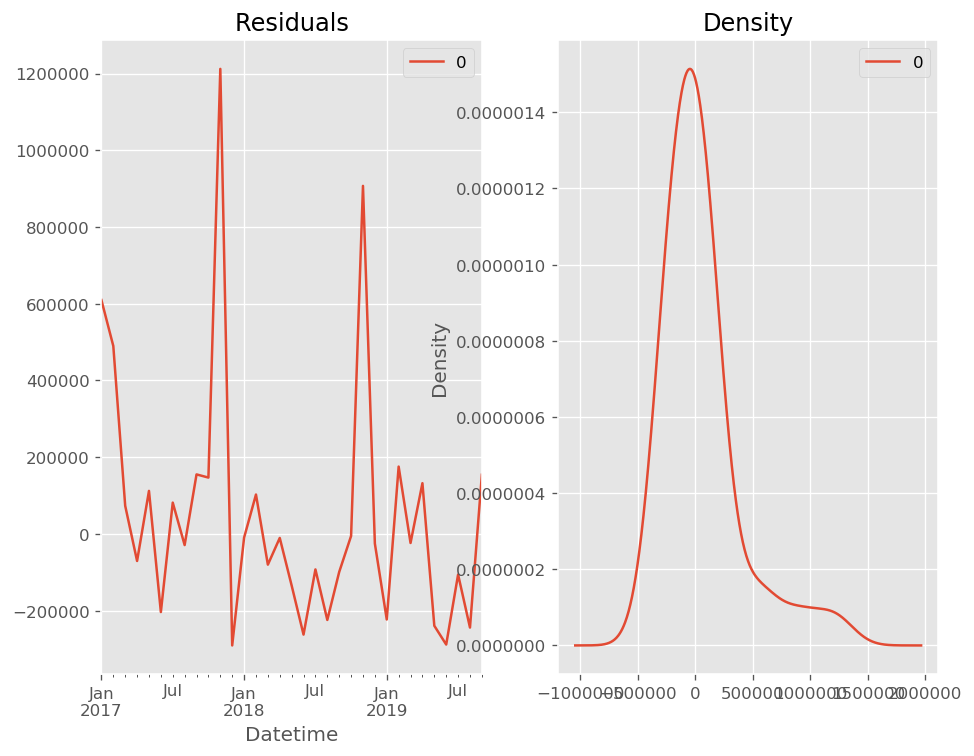

In [50]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

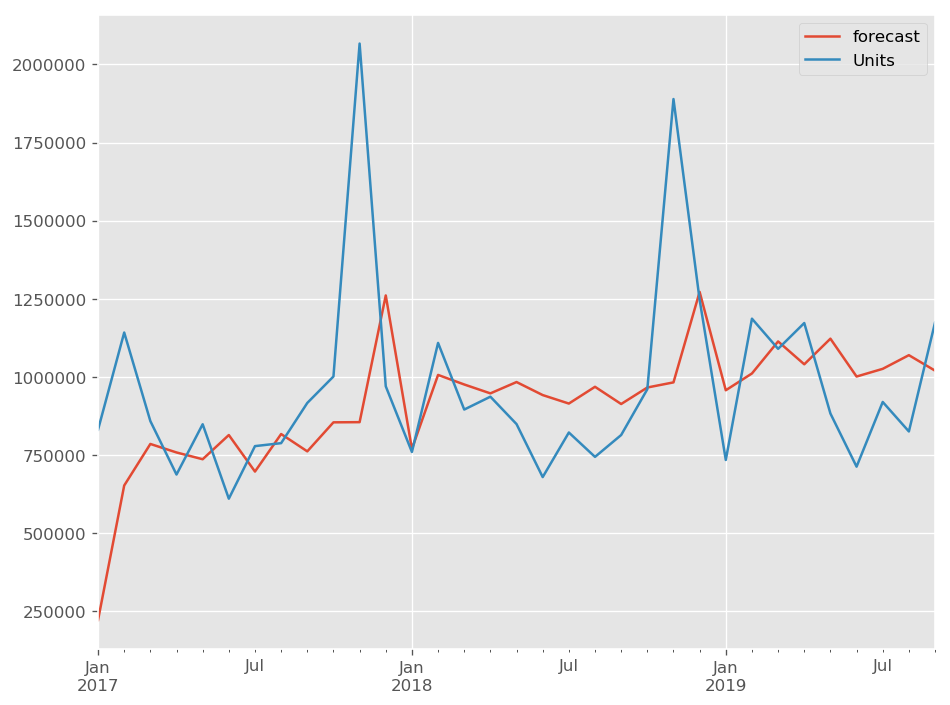

In [51]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\tytea\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\tytea\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\tytea\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


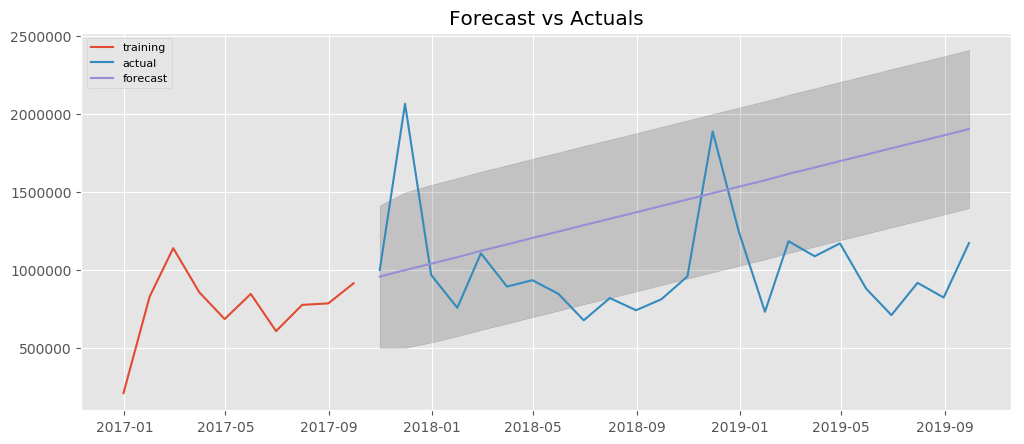

In [57]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = md[:10]
test = md[10:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(24, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                              ARMA Model Results                              
Dep. Variable:                  Units   No. Observations:                   85
Model:                     ARMA(2, 1)   Log Likelihood                -913.242
Method:                       css-mle   S.D. of innovations          11201.811
Date:                Sun, 10 Nov 2019   AIC                           1836.483
Time:                        14:30:08   BIC                           1848.697
Sample:                             0   HQIC                          1841.396
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.526e+04   2190.340     11.533      0.000     2.1e+04    2.96e+04
ar.L1.Units     0.3136      0.349      0.898      0.372      -0.371       0.998
ar.L2.Units     0.2514      0.136      1.851    

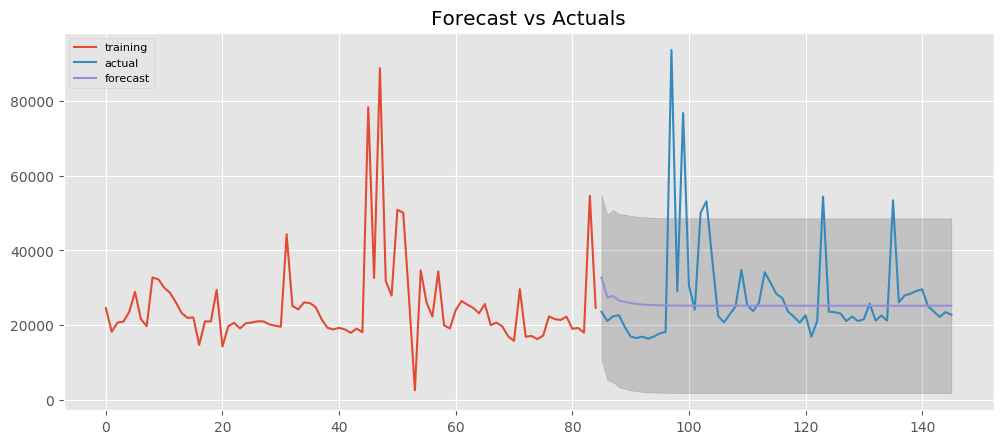

In [85]:
# Build Model
model = ARIMA(train, order=(2, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(61, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [80]:
fc

array([35709.05404874, 32502.40143931, 36690.58473666, 33723.53858503,
       35835.2596036 , 35407.75750547, 36308.86437707, 36281.93117615,
       36908.88235002, 37160.70549474, 37628.63884159, 37968.03634806,
       38399.32711906, 38780.92429165, 39198.59941248, 39601.23141072,
       40020.42686054, 40436.29060225, 40861.08664313, 41287.37628128,
       41719.71967388, 42155.28450011, 42595.82184967, 43040.25945908,
       43489.25463367, 43942.40173515, 44399.95124048, 44861.74915421,
       45327.89003305, 45798.31566244, 46273.06193248, 46752.10674961,
       47235.46369763, 47723.12441848, 48215.09405988, 48711.36945234,
       49211.95254594, 49716.84214079, 50226.03897554, 50739.54259545,
       51257.3532804 , 51779.47085814, 52305.8954347 , 52836.62694481,
       53371.66542864, 53911.01086147, 54454.66325852, 55002.62261042,
       55554.88892293, 56111.4621925 , 56672.34242133, 57237.52960806,
       57807.02375353, 58380.82485722, 58958.93291944, 59541.34794001,
      

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=989.890, BIC=992.822, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=981.821, BIC=987.684, Fit time=0.065 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=989.567, BIC=993.965, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=983.382, BIC=990.710, Fit time=0.087 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=981.673, BIC=986.070, Fit time=0.046 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=979.926, BIC=985.789, Fit

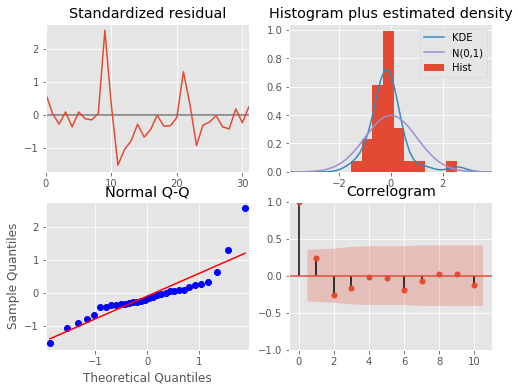

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(md.Units, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
model.plot_diagnostics(figsize=(8,6))
plt.show()

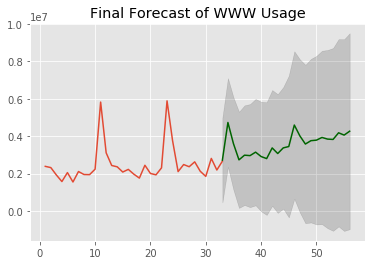

In [9]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(md2.Units), len(md2.Units)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(md2.Units)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

Date
2016-12-26    24633
2017-01-02    18311
2017-01-09    20761
2017-01-16    20999
2017-01-23    23590
Name: Units, dtype: int32


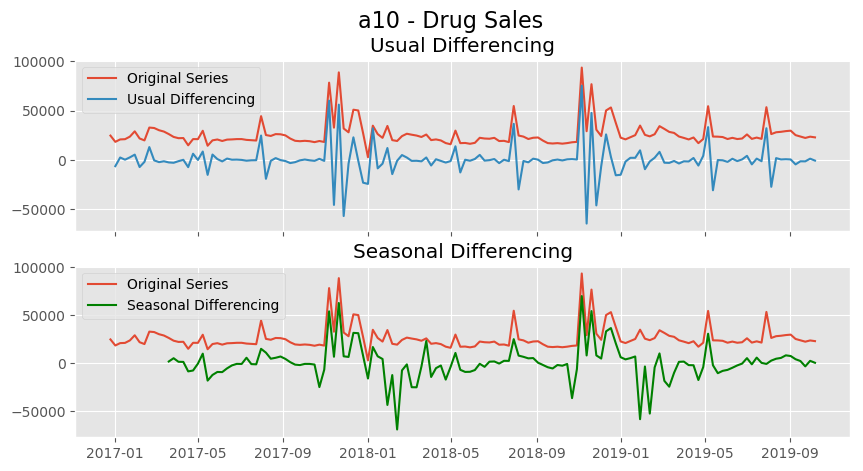

In [97]:
# Import
data = md
print(data.head())
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [69]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=1,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

NameError: name 'data' is not defined

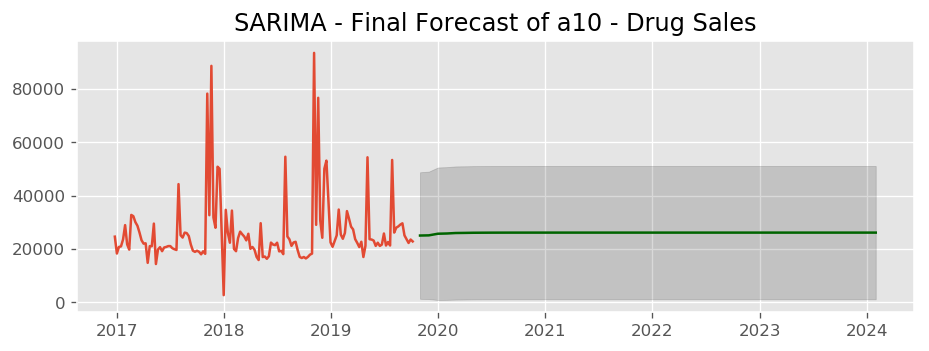

In [104]:
# Forecast
n_periods = 52
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [102]:
pm.auto_arima?

Signature:
pm.auto_arima(
    ['y', 'exogenous=None', 'start_p=2', 'd=None', 'start_q=2', 'max_p=5', 'max_d=2', 'max_q=5', 'start_P=1', 'D=None', 'start_Q=1', 'max_P=2', 'max_D=1', 'max_Q=2', 'max_order=10', 'm=1', 'seasonal=True', 'stationary=False', "information_criterion='aic'", 'alpha=0.05', "test='kpss'", "seasonal_test='ocsb'", 'stepwise=True', 'n_jobs=1', 'start_params=None', 'trend=None', 'method=None', 'transparams=True', "solver='lbfgs'", 'maxiter=None', 'disp=0', 'callback=None', 'offset_test_args=None', 'seasonal_test_args=None', 'suppress_warnings=False', "error_action='warn'", 'trace=False', 'random=False', 'random_state=None', 'n_fits=10', 'return_valid_fits=False', 'out_of_sample_size=0', "scoring='mse'", 'scoring_args=None', 'with_intercept=True', 'sarimax_kwargs=None', '**fit_args'],
)
Docstring:
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal
parameters for an ``ARIMA`` model, settling on a singl

In [28]:
# brand = input("Brand: ")
brand = "VIZIO"

In [29]:
# size = input("Size: ")
size = '65'

In [30]:
# segment = input("Segment: ")
segment = "UHD ENTRY"

In [31]:
# outlet = input("Outlet: ")
outlet = "WMT001"

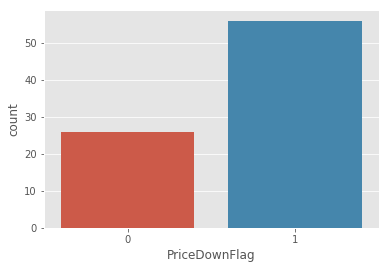

In [41]:
df = df[(df['Brand'] == brand) & (df['Size (group)'] == size) & (df['UHD Segment'] == segment) & (df['Year'] >= 2019) & (df['Outlet'] == outlet)]
df2 = df
sns.countplot(data=df, x='PriceDownFlag')

# df = df[(df['PriceDownFlag'] != 1)]
# df = df[df['ProductivityLift'] < 1.5]

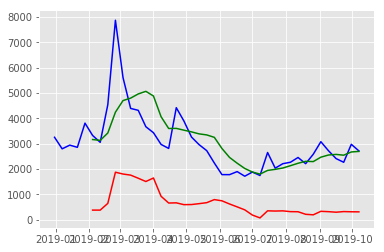

In [42]:
ds1 = df2[['Date', 'Units']]
ds1 = ds1.groupby('Date').sum()
ds1 = ds1.reset_index()
ds1 = ds1.set_index(['Date'])

rollingmean = ds1.rolling(window=6).mean()
rollingstd = ds1.rolling(window=6).std()

# print(ds1)

orig = plt.plot(ds1, color='blue', label='Actual')
mean = plt.plot(rollingmean, color = 'green', label='Rolling Mean')
std = plt.plot(rollingstd, color='red', label='Rolling STD')




In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determine rolling statistics
    movingAverage = timeseries.rolling(window=52).mean()
    movingSTD = timeseries.rolling(window=52).std
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label="Rolling STD")
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #perform Dickey-Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Units'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '# of Observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [44]:
stat1 = df['Productivity'].describe()

df['Productivity'].describe()

count    82.000000
mean      0.559756
std       0.223667
min       0.170000
25%       0.400000
50%       0.530000
75%       0.707500
max       1.460000
Name: Productivity, dtype: float64

In [45]:
df.info()

df.Productivity.std()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 233404 to 237501
Data columns (total 15 columns):
Date             82 non-null datetime64[ns]
Outlet           82 non-null object
Brand            82 non-null object
SKU              82 non-null object
Size (group)     82 non-null object
UHD Segment      82 non-null object
Sub Res          82 non-null object
Year             82 non-null int64
Week             82 non-null int64
Units            82 non-null int32
Stores           82 non-null int64
Price            82 non-null int64
Productivity     82 non-null float64
PriceChange      82 non-null float64
PriceDownFlag    82 non-null int64
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(6)
memory usage: 12.4+ KB


0.22366738758925656

In [5]:
df = df[np.abs(df.Productivity-df.Productivity.mean())<=(2*df.Productivity.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'

X = df[['Productivity','Price']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
X = X.loc[:,X.isnull().mean() < .5]
X = X[~np.isnan(X).any(axis=1)]
Y = X['Productivity']
X = X.drop('Productivity', axis=1)

Y.describe()
# print(X)


count    199668.000000
mean         23.246976
std         117.995207
min           0.000000
25%           0.480000
50%           1.000000
75%           4.000000
max        2071.000000
Name: Productivity, dtype: float64

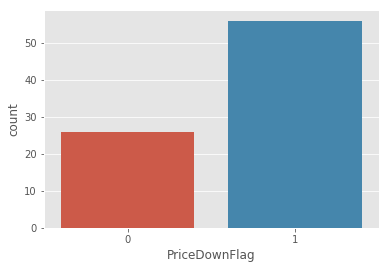

In [47]:
sns.countplot(data=df2, x="PriceDownFlag")

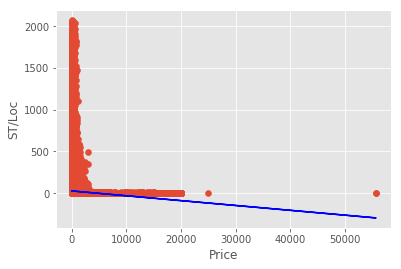

In [6]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.ylabel('ST/Loc')
plt.xlabel('Price')
plt.show()
# plt.savefig('sample.png')


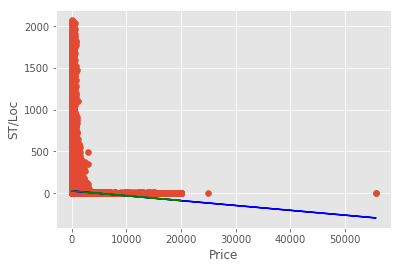

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred2 = regressor.predict(X_test)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.plot(X_test, y_pred2, color='green')
plt.ylabel('ST/Loc')
plt.xlabel('Price')
plt.show()



In [8]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
# print(est2.summary())

# Stats 2

stat2 = est2.summary()


lm = LinearRegression()
lm.fit(X,Y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

print(params)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X.reset_index(drop=True)))
MSE = (sum((Y-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

print(p_values)
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]

p_values = np.delete(p_values,0,0)

# print(pd.DataFrame(np.transpose(lm.coef_)))

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coefficients.columns = ['variable', 'coefficient']

# print(pd.DataFrame({'intercept':[lm.intercept_]}))                         

reg = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose([lm.intercept_]))], axis = 1)
reg.columns = ['variable', 'intercept']

pvalues = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(p_values))], axis = 1)
pvalues.columns = ['variable', 'pvalue']


                     



C:\Users\tytea\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[ 2.70445703e+01 -5.80159172e-03]
[0.0, 0.0]


In [33]:
m1 = pd.merge(coefficients, pvalues)
union = pd.merge(reg, m1)
result = union.fillna(0)
result['fm'] = "y = {}x + b (p = {})".format(round(float(result['coefficient']), 2), round(float(result['intercept']), 2), round(float(result['pvalue']),2))
result['fm'].loc[0]

# formula = "y = {}x + b (p = {}".format(result['coefficient'], result['intercept'], result['pvalue'])
# formula

'y = -0.01x + b (p = 27.04)'

In [18]:
print("ST/Loc Measure")

stat3 = "{} {} {}-{}\n\n{}\n\n---------\n{}".format(brand,size,segment,outlet,result,stat2)

print(stat3)

ST/Loc Measure
LG 65 UHD PREMIUM-Remaining Retail

  variable  intercept  coefficient  pvalue
0    Price   1.018558    -0.000118   0.178

---------
                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.844
Date:                Tue, 29 Oct 2019   Prob (F-statistic):              0.178
Time:                        10:24:33   Log-Likelihood:                -18.537
No. Observations:                  86   AIC:                             41.07
Df Residuals:                      84   BIC:                             45.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0

In [20]:
import matplotlib
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
import matplotlib.animation as animation
from matplotlib import style
# from ipynb.fs.full.Regression import df
import tkinter as tk
from tkinter import ttk
import urllib
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [21]:
LARGE_FONT= ("Verdana", 12)
style.use("ggplot")

f = Figure()


# f = plt.show()
a = f.add_subplot(111)

def animate(i):
#     dataLink = 'https://btc-e.com/api/3/trades/btc_usd?limit=2000'
#     data = urllib.request.urlopen(dataLink)
#     data = data.readall().decode("utf-8")
#     data = json.loads(data)

    
#     data = df["Price"]
#     data = pd.DataFrame(data)

# #     buys = data[(data['type']=="bid")]
#     buys["datestamp"] = np.array(buys["timestamp"]).astype("datetime64[s]")
#     buyDates = (buys["datestamp"]).tolist()
    

#     sells = data[(data['type']=="ask")]
#     sells["datestamp"] = np.array(sells["timestamp"]).astype("datetime64[s]")
#     sellDates = (sells["datestamp"]).tolist()

#     a.clear()

#     a.plot_date(buyDates, buys["price"], "#00A3E0", label="buys")
#     a.plot_date(sellDates, sells["price"], "#183A54", label="sells")

#     a.legend(bbox_to_anchor=(0, 1.02, 1, .102), loc=3,
#              ncol=2, borderaxespad=0)
    plt.title(label = str(brand) + " " + str(size) + " " + str(segment) + " -"  + str(outlet))    
#     plt.figure(figsize=(8,5))
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='blue')
    plt.plot(X_test, y_pred2, color='green')
    plt.ylabel('ST/Loc')
    plt.xlabel('Price')
    plt.show()

#     title = "Price vs Productivity: "
#     a.set_title(title)
    
#     sns.countplot(data=df2, x='PriceDownFlag')

       

class SeaofBTCapp(tk.Tk):

    def __init__(self, *args, **kwargs):
        
        tk.Tk.__init__(self, *args, **kwargs)

#         tk.Tk.iconbitmap(self, default="clienticon.ico")
        tk.Tk.wm_title(self, "Price to Performance Analysis")
        
        
        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand = True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)


        menubar = tk.Menu(container)
        filemenu = tk.Menu(menubar, tearoff=0)
        filemenu.add_command(label="Save settings", command = lambda: popupmsg("Not supported just yet!"))
        filemenu.add_separator()
        filemenu.add_command(label="Exit", command=quit)
        menubar.add_cascade(label="File", menu=filemenu)

        tk.Tk.config(self, menu=menubar)

        self.frames = {}

        for F in (StartPage, BTCe_Page):

            frame = F(container, self)

            self.frames[F] = frame

            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame(StartPage)

    def show_frame(self, cont):

        frame = self.frames[cont]
        frame.tkraise()

        
class StartPage(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self,parent)
        label = tk.Label(self, text=stat3, font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Enter",
                            command=lambda: controller.show_frame(BTCe_Page))

        button1.pack()

#         button2 = ttk.Button(self, text="Exit",
#                             command=quit)
#         button2.pack()
        



class PageOne(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Page One!!!", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()




class BTCe_Page(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Graph Page!", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()
        
#         sns.countplot(data=df2, x='PriceDownFlag')

        canvas = FigureCanvasTkAgg(f, self)
#         canvas.show()
        canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

        toolbar = NavigationToolbar2Tk(canvas, self)
        toolbar.update()
        canvas._tkcanvas.pack(side=tk.TOP, fill=tk.BOTH, expand=True)



app = SeaofBTCapp()
app.geometry("1280x720")
ani = animation.FuncAnimation(f, animate, interval=5000)
app.mainloop()

In [ ]:
# import tkinter as tk

# root= tk.Tk()

# canvas1 = tk.Canvas(root, width = 400, height = 300)
# canvas1.pack()

# entry1 = tk.Entry (root) 
# canvas1.create_window(200, 140, window=entry1)


# def getModel ():  
#     x1 = entry1.get()
    
#     label1 = tk.Label(root, text= float(x1)**0.5)
#     canvas1.create_window(200, 230, window=label1)
    
# button1 = tk.Button(text='Select Model', command=getModel)
# canvas1.create_window(200, 180, window=button1)

# root.mainloop()

In [ ]:
import tkinter as tk
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

   
Data1 = {'Country': ['US','CA','GER','UK','FR'],
        'GDP_Per_Capita': [45000,42000,52000,49000,47000]
       }

df1 = DataFrame(Data1, columns= ['Country', 'GDP_Per_Capita'])
df1 = df1[['Country', 'GDP_Per_Capita']].groupby('Country').sum()



  
df2 = DataFrame(Data2,columns=['Year','Unemployment_Rate'])
df2 = df2[['Year', 'Unemployment_Rate']].groupby('Year').sum()



Data3 = {'Interest_Rate': [5,5.5,6,5.5,5.25,6.5,7,8,7.5,8.5],
        'Stock_Index_Price': [1500,1520,1525,1523,1515,1540,1545,1560,1555,1565]
       }
  
df3 = DataFrame(Data3,columns=['Interest_Rate','Stock_Index_Price'])
 
  

root= tk.Tk() 
  

figure1 = plt.Figure(figsize=(6,5), dpi=100)
ax1 = figure1.add_subplot(111)
bar1 = FigureCanvasTkAgg(figure1, root)
bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df1.plot(kind='bar', legend=True, ax=ax1)
ax1.set_title('Country Vs. GDP Per Capita')


figure2 = plt.Figure(figsize=(5,4), dpi=100)
ax2 = figure2.add_subplot(111)
line2 = FigureCanvasTkAgg(figure2, root)
line2.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
df2.plot(kind='line', legend=True, ax=ax2, color='r',marker='o', fontsize=10)
ax2.set_title('Year Vs. Unemployment Rate')


figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df3['Interest_Rate'],df3['Stock_Index_Price'], color = 'g')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
ax3.legend() 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Stock Index Price')

root.mainloop()

In [1]:
def f5(seq, idfun=None): 
   # order preserving
   if idfun is None:
       def idfun(x): return x
   seen = {}
   result = []
   for item in seq:
       marker = idfun(item)
       # in old Python versions:
       # if seen.has_key(marker)
       # but in new ones:
       if marker in seen: continue
       seen[marker] = 1
       result.append(item)
   return result

In [2]:
from regression_output import rd2 as rd

C:\Users\tdang\OneDrive - Vizio\Documents\Python\marketdata-master\regression_output.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rd2['Price'][rd2['Price'] == inf] = np.nan


In [3]:
f5(rd['Date'])

[Timestamp('2016-12-26 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-30 00:00:00'),
 Timestamp('2017-02-06 00:00:00'),
 Timestamp('2017-02-13 00:00:00'),
 Timestamp('2017-02-20 00:00:00'),
 Timestamp('2017-02-27 00:00:00'),
 Timestamp('2017-03-06 00:00:00'),
 Timestamp('2017-03-13 00:00:00'),
 Timestamp('2017-03-20 00:00:00'),
 Timestamp('2017-03-27 00:00:00'),
 Timestamp('2017-04-03 00:00:00'),
 Timestamp('2017-04-10 00:00:00'),
 Timestamp('2017-04-17 00:00:00'),
 Timestamp('2017-04-24 00:00:00'),
 Timestamp('2017-05-01 00:00:00'),
 Timestamp('2017-05-08 00:00:00'),
 Timestamp('2017-05-15 00:00:00'),
 Timestamp('2017-05-22 00:00:00'),
 Timestamp('2017-05-29 00:00:00'),
 Timestamp('2017-06-05 00:00:00'),
 Timestamp('2017-06-12 00:00:00'),
 Timestamp('2017-06-19 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2017-07-